In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    
    # we want w (weigths) from Xw = y
    # do some linear algebra to isolate w

    XTX = X.T.dot(X) # Gram matrix, makes X into a square matrix by multiplying it by its transpose
    XTX_inv = np.linalg.inv(XTX) # invert the gram matrix
    w = XTX_inv.dot(X.T).dot(y) # now can solve for w from Xw = y
    
    return w[0], w[1:]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def rmse(y, y_pred):
    # for each predicted value, find difference between it and actual
    error = y_pred - y
    # now square this error, and calculate the mean
    mse = (error**2).mean()
    # return the squar-rooted mse
    return np.sqrt(mse)

# Notes 2-7

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [49]:
df[df.water<160]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
69,485.0,0.0,0.0,146.0,0.0,1120.0,800.0,28,71.99
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
73,425.0,106.3,0.0,151.4,18.6,936.0,803.7,3,36.30
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.00
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.20
...,...,...,...,...,...,...,...,...,...
886,148.0,0.0,137.0,158.0,16.0,1002.0,830.0,28,17.95
908,313.0,145.0,0.0,127.0,8.0,1000.0,822.0,28,44.52
949,148.1,0.0,136.6,158.1,16.1,1001.8,830.1,28,17.96
971,312.7,144.7,0.0,127.3,8.0,999.7,822.2,28,44.52


In [50]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [51]:
df.columns = df.columns.str.upper()

In [52]:
df

,CEMENT,SLAG,FLYASH,WATER,SUPERPLASTICIZER,COARSEAGGREGATE,FINEAGGREGATE,AGE,CSMPA
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [53]:
df.isnull().sum()

CEMENT              0
SLAG                0
FLYASH              0
WATER               0
SUPERPLASTICIZER    0
COARSEAGGREGATE     0
FINEAGGREGATE       0
AGE                 0
CSMPA               0
dtype: int64

In [57]:
df.groupby('AGE').SLAG.mean()

AGE
1        0.000000
3       65.977612
7       92.943651
14      18.590323
28      86.285176
56      55.221978
90      88.524074
91     148.809091
100     22.165385
120      0.000000
180     49.319231
270     72.346154
360     56.966667
365     67.178571
Name: SLAG, dtype: float64

## Plotting

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
y = df['SLAG']
x1 = df['CEMENT']
x2 = df['WATER']

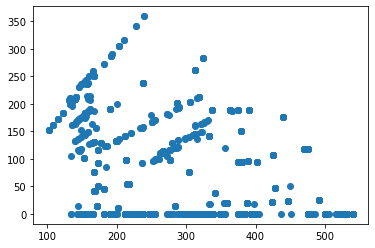

In [63]:
plt.scatter(x1,y)

(array([540.,  41.,  10.,  80.,  85.,  72., 103.,  42.,  22.,  15.,  10.,
          6.,   4.]),
 array([  0.        ,  27.64615385,  55.29230769,  82.93846154,
        110.58461538, 138.23076923, 165.87692308, 193.52307692,
        221.16923077, 248.81538462, 276.46153846, 304.10769231,
        331.75384615, 359.4       ]),
 <BarContainer object of 13 artists>)

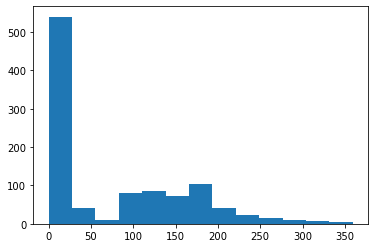

In [64]:
plt.hist(y,bins='auto')

<AxesSubplot:xlabel='SLAG', ylabel='Count'>

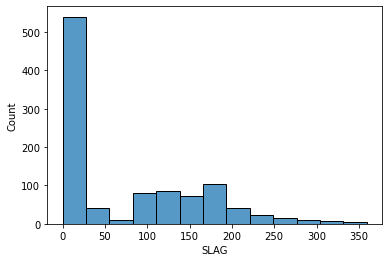

In [66]:
sns.histplot(y)

## Excesize: Figure out what descriptors you would use for linear regression

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [ ]:
# let's plot each column of data as a histogram so that
# we can determine if that data has a good spread
# and will work well as a descriptor for building a machine learning model

In [72]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<AxesSubplot:xlabel='cement', ylabel='Count'>

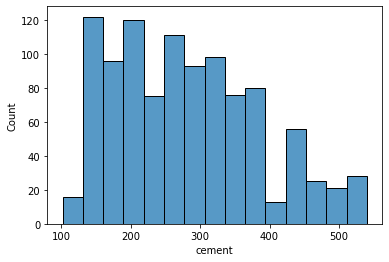

In [73]:
# This one has a decent spread in values
sns.histplot(df.cement)

<AxesSubplot:xlabel='slag', ylabel='Count'>

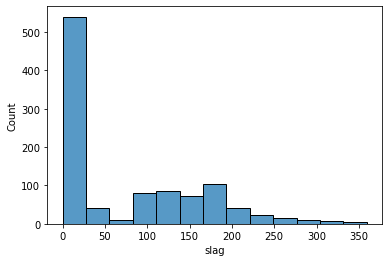

In [74]:
# This one is heavily skewed, may be difficult
# for a model to recognize patterns
sns.histplot(df.slag)

<AxesSubplot:xlabel='flyash', ylabel='Count'>

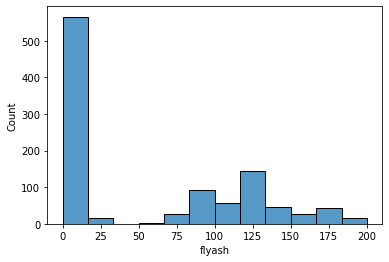

In [75]:
# This one has many values of zero
# this kind of distribution is difficult to extract info from
sns.histplot(df.flyash)

<AxesSubplot:xlabel='water', ylabel='Count'>

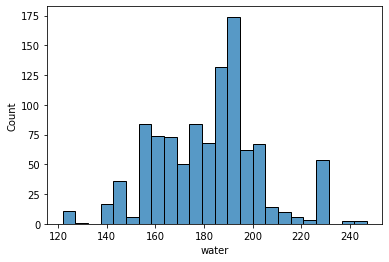

In [76]:
# This is a decent gaussian-like distribution
sns.histplot(df.water)

<AxesSubplot:xlabel='superplasticizer', ylabel='Count'>

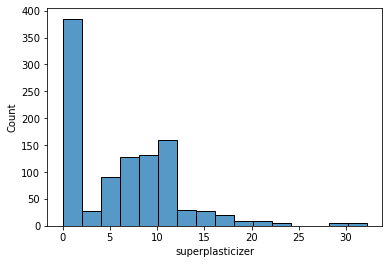

In [77]:
# once again, many values near or at zero
# makes it difficult for building model
sns.histplot(df.superplasticizer)

In [78]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<AxesSubplot:xlabel='coarseaggregate', ylabel='Count'>

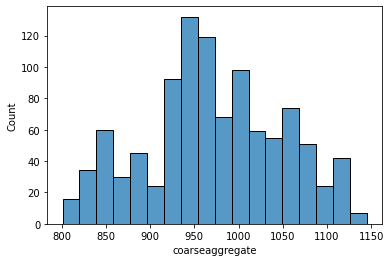

In [79]:
# another nice gaussian like distribution
sns.histplot(df.coarseaggregate)

<AxesSubplot:xlabel='fineaggregate', ylabel='Count'>

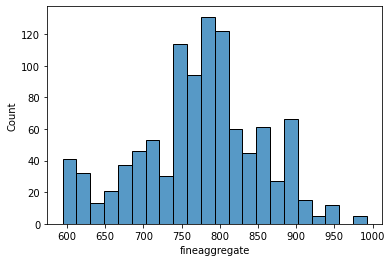

In [80]:
# another nice gaussian-like distribution
sns.histplot(df.fineaggregate)

<AxesSubplot:xlabel='age', ylabel='Count'>

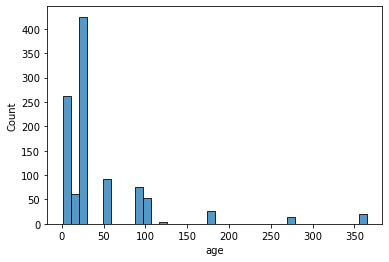

In [81]:
# a bit sparce and skewed
# probably not the greatest for training dataset
sns.histplot(df.age)

<AxesSubplot:xlabel='csMPa', ylabel='Count'>

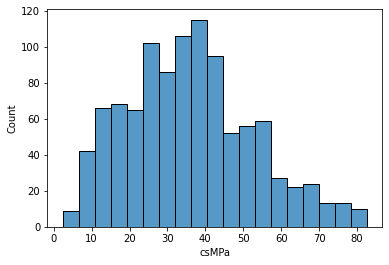

In [82]:
# this is our target dataset to try to predict
# good distribution to try to predict
sns.histplot(df.csMPa)

- so it looks like 'fineaggregate', 'coarseaggregate', 'water', and 'cement' are decent data to use
for training our model based on their nice continuous distributions

# Linear Regression, notes from online course

In [83]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
import numpy as np

In [84]:
# setting up the validation framework
# first we set up the lengths of each part of framework
# 20 percent for test, 20 percent for validation, 60 percent for training

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test
if (n_val+n_test+n_train == len(df)):
    print('length match!')

length match!


In [85]:
# now we shuffle our indices for the data to make sure any previous ordering does not cause bias
# then assign the number of indices equal to the percent given to each part of framework

idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
432,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,28,26.20
238,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97
830,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
677,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68
...,...,...,...,...,...,...,...,...,...
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
176,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,91,56.50
459,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,100,55.02
275,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,14,29.93


In [86]:
if (len(df_val)+len(df_test)+len(df_train) == len(df)):
    print('length match!')

length match!


In [87]:
# now renumber indices within each part

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
1,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,28,26.20
2,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97
3,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
4,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68
...,...,...,...,...,...,...,...,...,...
613,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
614,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,91,56.50
615,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,100,55.02
616,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,14,29.93


In [88]:
# move out target into new variable

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

In [89]:
# delete out our target so we don't use it in training!

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

# also, delete the columns which were determined to be no good for machine learning
# based on their funky distributions

# del df_train['flyash']
# del df_val['flyash']
# del df_test['flyash']
# del df_train['slag']
# del df_val['slag']
# del df_test['slag']
# del df_train['age']
# del df_val['age']
# del df_test['age']
# del df_train['superplasticizer']
# del df_val['superplasticizer']
# del df_test['superplasticizer']

In [90]:
if (len(y_val)+len(y_test)+len(y_train) == len(df)):
    print('length match!')

length match!


In [92]:
# here is one row of train
# let's do our linear regression on a single entry in our train dataset first

df_train.iloc[10]

cement              312.7
slag                144.7
flyash                0.0
water               127.3
superplasticizer      8.0
coarseaggregate     999.7
fineaggregate       822.2
age                  28.0
Name: 10, dtype: float64

In [100]:
# we take data from the cement, coarseaggregate, fineaggregate, and water sections

xi=[312.7, 127.3, 999.7, 822.2]

In [111]:
# bias term w0
w0 = 4.15
# weights
w = [0.01,0.04,0.002,0.02]

# for now these terms are arbitrarily chosen

In [107]:
# now we write function which takes in these numbers and gives us a csMPa prediction

def lin_reg(xi, w0, w):
    # calculates the expected target value based on linear regression
    # xi is the list of values from the data used to predict
    # w0 is the bias
    # w is the weights for each xi value
    """
    Formula is... g(x_i) = w_0 + SUM(w_j * x_ij, j = 1, len(xi))
    For 3 values in xi... g(x_i) = w_0 + (w_1 * x_i1) + (w_2 * x_i2) + (w_3 * x_i3)
    
    """
    
    n = len(xi)
    
    # start with bias
    pred = w0
    
    # here we sum up each xi value with its associated weight
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [109]:
lin_reg(xi, w0, w)

30.812400000000004

# Notes 2/9

## Test/validation split Excersize

- Produce a split using sklearn

In [65]:
# Produce split using scikit library

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [66]:
# store all data minus target in x
# store target in y
x = df
y = df['csMPa']
del x['csMPa']

In [67]:
# now assign the train and test data
# do test data as 40% for now
df_train, x_test = train_test_split(x, random_state=104,test_size=0.40, shuffle=True)
df_train.index

Int64Index([366, 476, 491,   0, 273, 583, 404, 826, 530, 346,
            ...
            397, 537, 631, 227, 624, 520, 166, 654, 729,  69],
           dtype='int64', length=618)

In [68]:
# we now need to now split x_test into test and validation
df_val, df_test = train_test_split(x_test, random_state=104,test_size=0.50, shuffle=True)
df_val.index

Int64Index([949, 393, 891, 580, 554, 879, 332, 286, 697, 319,
            ...
            493, 809, 475, 429, 834, 918, 623, 759, 146, 329],
           dtype='int64', length=206)

In [69]:
if (len(df_val)+len(df_test)+len(df_train) == len(df)):
    print('length match!')

length match!


## Linear regression Excersize

- Here we train linear regression model ourselves

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [112]:
# we need to split the data into sections
# for validation, testing, and training
# Do 20% validation, 20% testing, and 60% training

# here are the number of rows corresponding to these percentages
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test
if (n_val+n_test+n_train == len(df)):
    print('length match!')

length match!


In [113]:
# now we shuffle our indices for the data to make sure any previous ordering does not cause bias
# then we split the shuffled data according to the percentages

# set seed
np.random.seed(1)

# make array representing shuffled indices
idx = np.arange(len(df))
np.random.shuffle(idx)

# now assign each part of framework the appropriate percent of the data
# this is done by giving df.iloc the indices from the data we want in a particular part of the framework
df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()
df_train.index

Int64Index([339, 244, 882, 567, 923, 358, 576,  27, 994, 563,
            ...
            360, 558, 764, 992, 225,  18, 168, 292, 625, 397],
           dtype='int64', length=618)

In [114]:
if (len(df_val)+len(df_test)+len(df_train) == len(df)):
    print('length match!')

length match!


In [115]:
# so we see how the entire dataframe has been shuffled 
# and then assigned to 3 different variables
# now renumber indices within each part

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.index

RangeIndex(start=0, stop=618, step=1)

In [116]:
# we need to delete target data so we don't use it in building model
# first move out target into new variable

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

# delete out our target so we don't use it in training!

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

In [117]:
# here is the columns we want to use as training
base = ['cement', 'coarseaggregate', 'fineaggregate', 'water']

In [118]:
# this will give us the weight values

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    
    # we want w (weigths) from Xw = y
    # do some linear algebra to isolate w

    XTX = X.T.dot(X) # Gram matrix, makes X into a square matrix by multiplying it by its transpose
    XTX_inv = np.linalg.inv(XTX) # invert the gram matrix
    w = XTX_inv.dot(X.T).dot(y) # now can solve for w from Xw = y
    
    return w[0], w[1:]

In [119]:
# this gets our training data ready for prediction

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [120]:
# use prepare_X to get our training data ready
# now pass it through train_linear_regression to obtain weights

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [121]:
# now use the weights to get our target prediction
y_pred = w_0 + X_train.dot(w)

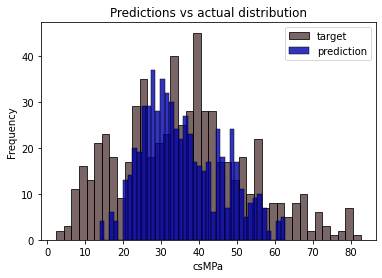

In [122]:
sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')
plt.show()

- This initial prediction/try is not bad, follows the general shape of target

# Notes 2/14

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Concrete_Data_Yeh.csv')

- First let's train our linear regression model again

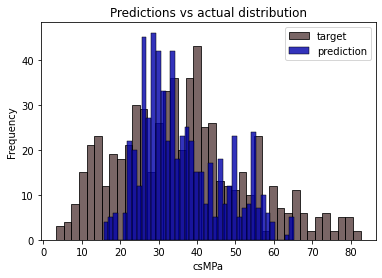

In [2]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    
    # we want w (weigths) from Xw = y
    # do some linear algebra to isolate w

    XTX = X.T.dot(X) # Gram matrix, makes X into a square matrix by multiplying it by its transpose
    XTX_inv = np.linalg.inv(XTX) # invert the gram matrix
    w = XTX_inv.dot(X.T).dot(y) # now can solve for w from Xw = y
    
    return w[0], w[1:]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

base = ['cement', 'coarseaggregate', 'fineaggregate', 'water']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

- Now find RMSE

In [25]:
# now find the RMSE for the base that we used to create predictions

def rmse(y, y_pred):
    # for each predicted value, find difference between it and actual
    error = y_pred - y
    # now square this error, and calculate the mean
    mse = (error**2).mean()
    # return the squar-rooted mse
    return np.sqrt(mse)

In [26]:
rmse(y_train, y_pred)

13.101016834600854

In [28]:
# now test our weights using our validation dataset

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val,y_pred)

12.693653914215096

In [35]:
# now let's change our base to include every descriptor

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate']

# and calculate the prediction based on these

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [36]:
rmse(y_train, y_pred)

10.460106104928043

In [37]:
# here we test our base using the validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

10.282525327153948

- So our RMSE value decreases when using all descriptors, rather than just a few from before

## Excersize: Create additional features as mathematical functions of existing ones

In [11]:
# let's take the ratio of coarseaggregate to fineaggregate and include this in our data

df=pd.read_csv('Concrete_Data_Yeh.csv')
ratio_coarse_fine = np.array(df.coarseaggregate.values/df.fineaggregate.values)
df["ratio_coarse_fine"] = ratio_coarse_fine
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,ratio_coarse_fine
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1.538462
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1.560651
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.569024
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.569024
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.185221


In [12]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate', 'ratio_coarse_fine']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

10.322978159735996

- Compare this RMSE to the one I get when excluding my new descriptor

In [13]:
# compare to without my new feature
base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

10.460106104928043

looks like my new feature improved the fit by a little when used
along with this combination of descriptors as the base

In [14]:
# let's try it with a different base
base = ['cement', 'coarseaggregate', 'fineaggregate', 'water',
        'ratio_coarse_fine']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

13.098354693445348

In [15]:
# and here is without the new descriptor
base = ['cement', 'coarseaggregate', 'fineaggregate', 'water']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

13.101016834600854

- still a small improvement. Now let's try subtracting cement and water
and taking the square-root of that

In [16]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
subtr = np.abs(df.water.values-df.cement.values)
sqrt_water_cement = np.array(np.sqrt(subtr))
df["sqrt_water_cement"] = sqrt_water_cement

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate', 'sqrt_water_cement']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

10.443001855152053

In [17]:
# compare to without my new feature
base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

10.460106104928043

looks like the new feature is once again a little helpful in improving rmse
- finally let's try combining features

In [18]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
subtr = np.abs(df.water.values-df.cement.values)
sqrt_water_cement = np.array(np.sqrt(subtr))
df["sqrt_water_cement"] = sqrt_water_cement

ratio_coarse_fine = np.array(df.coarseaggregate.values/df.fineaggregate.values)
df["ratio_coarse_fine"] = ratio_coarse_fine

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate', 'sqrt_water_cement','ratio_coarse_fine']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

10.300285761947219

- Interestingly, combining a new subtraction feature, and a new ratio feature together gives us the best RMSE yet

## Using sklearn for linear regression

- let's take the ratio of coarseaggregate to fineaggregate and include this in our data

In [13]:
# let's take the ratio of coarseaggregate to fineaggregate and include this in our data

df=pd.read_csv('Concrete_Data_Yeh.csv')
ratio_coarse_fine = np.array(df.coarseaggregate.values/df.fineaggregate.values)
df["ratio_coarse_fine"] = ratio_coarse_fine

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate',"ratio_coarse_fine"]
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

10.322978159735996

- We can compare this to the linear regression from sklearn

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(math.sqrt(-1.0*mean_mse))

10.527703127013964


- the nearer this value is to zero, the better the model
- We can also get the weights from sklearn...

In [15]:
lin_regressor.fit(X_train, y_train)
print('Here is the sklearn weights:', lin_regressor.coef_)
print('')
print('Here is the weights from manual lin regression:', w)

Here is the sklearn weights: [  0.11976348   0.10254088   0.07739744  -0.12456354   0.12350427
   0.41947889   0.10951929  -0.08979822 -69.21900273]

Here is the weights from manual lin regression: [  0.11976348   0.10254088   0.07739744  -0.12456354   0.12350427
   0.41947889   0.10951929  -0.08979822 -69.21900273]


- We see how both methods give us the same answer

## Excersize: Use LASSO on descriptors

- Now let's try lasso technique with sklearn, using the features defined above
- Below we provide the algorithm with different values 
- The algorithm will find which value gives the best fit
- we then print out this best value, along with the best score we got with that value

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(math.sqrt(-1.0*lasso_regressor.best_score_))

{'alpha': 0.001}
10.527675873350788


C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.725e+04, tolerance: 1.470e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.572e+04, tolerance: 1.378e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.549e+04, toleranc

In [17]:
math.sqrt(-1.0*lasso_regressor.best_score_)/math.sqrt(-1.0*mean_mse)

0.9999974112431887

Looks like the value for the fit is pretty much the same as linear regression

At this point we can make the prediction of the target data using the algorithm

In [18]:
prediction_lasso=lasso_regressor.predict(X_train)

Then we can compare these predictions using the Lasso model vs. the other linear regression model

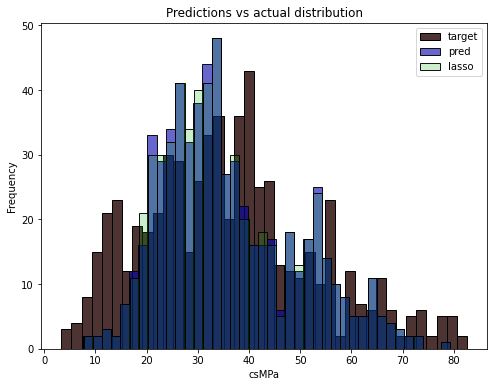

In [19]:
plt.figure(figsize=(8, 6))

sns.histplot(y_train, label='target', color='#220000', alpha=0.8, bins=40)
sns.histplot(y_pred, label='pred', color='#0000aa', alpha=0.6, bins=40)
sns.histplot(prediction_lasso, label='lasso', color='#00aa00', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

- Results look very similar
- And now we can also plot the weights to see how this model did vs the other one

In [26]:
# here are the weights given by the lasso algorithm using the best parameter we provided
print(lasso_regressor.best_estimator_.coef_)

[  0.11970647   0.10252321   0.07754039  -0.12465056   0.12341076
   0.41812565   0.1073194   -0.08696502 -67.53147735]


In [27]:
# here are the weights given by our other linear regression
print(w)

[  0.11976348   0.10254088   0.07739744  -0.12456354   0.12350427
   0.41947889   0.10951929  -0.08979822 -69.21900273]


C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


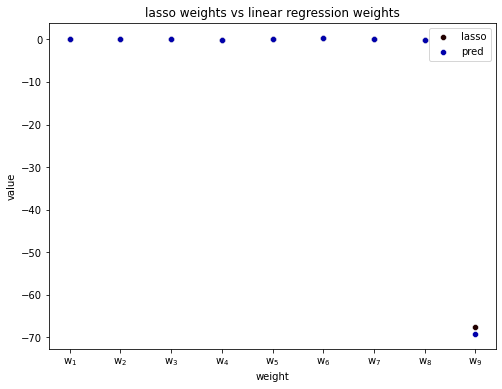

In [35]:
# now let's plot
plt.figure(figsize=(8, 6))

x = ('w$_{1}$','w$_{2}$','w$_{3}$','w$_{4}$','w$_{5}$','w$_{6}$','w$_{7}$','w$_{8}$','w$_{9}$')
sns.scatterplot(x,lasso_regressor.best_estimator_.coef_, label='lasso', color='#220000')
sns.scatterplot(x,w, label='pred', color='#0000aa')

plt.legend()

plt.ylabel('value')
plt.xlabel('weight')
plt.title('lasso weights vs linear regression weights')

plt.show()

- Looks like the weights are all very similar, the last set on the bottom right of plot differ a little

## Notes 2/16

In [158]:
df=pd.read_csv('./Concrete_Data_Yeh.csv')

# let's make a new category for 'good' vs. 'bad' concrete
# do this by having good be csMPa > 45.0
# also have a category of flyash---> yes or no

df['goodconcrete']=(df.csMPa>45.0).astype(int)
# now delete the actual values for csMPa
# the target values are now categorical
del df['csMPa']

# here we give condition that concrete has flyash
df['flyash']=(df.flyash>5.0)
# and replace the boolean with yes or no
df['flyash'] = df['flyash'].replace({True: 'yes', False: 'no'})

In [159]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,goodconcrete
0,540.0,0.0,no,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,no,162.0,2.5,1055.0,676.0,28,1
2,332.5,142.5,no,228.0,0.0,932.0,594.0,270,0
3,332.5,142.5,no,228.0,0.0,932.0,594.0,365,0
4,198.6,132.4,no,192.0,0.0,978.4,825.5,360,0


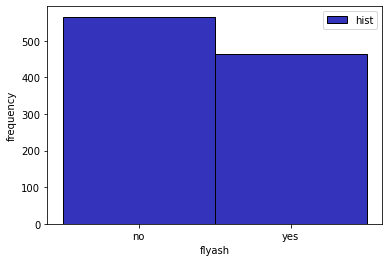

In [160]:
plt.figure(figsize=(6, 4))

sns.histplot(df.flyash, label='hist', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('flyash')

plt.show()

now that we have created these new categorical columns, we can split our dataset

In [161]:
# split data using sklearn

# now assign the train and test data
df_train_full, df_test = train_test_split(df, random_state=104,test_size=0.20, shuffle=True)

# we now need to now split df_train_full into separate train and validation
df_train, df_val = train_test_split(df_train_full, random_state=100,test_size=0.25, shuffle=True)
df_val.index

# move target values out
y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values
y_test = df_test.goodconcrete.values

# get rid of target values in training data
del df_train['goodconcrete']
del df_val['goodconcrete']
del df_test['goodconcrete']

print(len(df_val)/len(df),len(df_test)/len(df),len(df_train)/len(df))

0.2 0.2 0.6


In [162]:
global_mean = df_train_full.goodconcrete.mean()
round(global_mean, 3)

0.249

In [163]:
# let's find the mean value of 'goodconcrete' given the subset of only 'yes' flyash
flyyes_mean = df_train_full[df_train_full.flyash == 'yes'].goodconcrete.mean()
print('flyash == yes:', round(flyyes_mean, 3))

# same thing but for subset of 'no' flyash
flyno_mean = df_train_full[df_train_full.flyash == 'no'].goodconcrete.mean()
print('flyash == no:  ', round(flyno_mean, 3))

# these values are essentially the percent of concrete considered good in these subsets

flyash == yes: 0.224
flyash == no:   0.271


In [164]:
# we can also look at the mean value of good concrete for a subset 
# with a conditional on a different category than the ones we made binary
# here is one for water content

df_train_full[df_train_full.water < 200].goodconcrete.mean()

0.2611832611832612

In [165]:
# combine multiple conditionals to create a new subset
df_train_full[(df_train_full.water < 200)&(df_train_full.water > 170)].goodconcrete.mean()

0.1515837104072398

## Mutual information and correlation
- How can we determine how much we know about one feature based on another?
- Mutual information
- let's see how well our categorical data for flyash describes our categorical data for good concrete

In [166]:
from sklearn.metrics import mutual_info_score
# it can be useful to define a function for this
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.goodconcrete)

In [167]:
categorical = ['flyash']
# we can enact our function on a subset of data with '.apply(calculate_mi)'
df_mi = df_train_full[categorical].apply(calculate_mi)
#df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi

flyash    0.001517
dtype: float64

- The absolute value here given for mutual information score is hard to interpret on its own
- Easier when other scores from other categorical features are compared
- However we previously know that 'flyash' seems to be a bad predictor for 'goodconcrete'
- Therefore this small number definitely shows us this is a weak correlation
- Weak correlation... let's see how the other variables fair against our target of 'goodconcrete'
- Instead of using mutual_info_score, let's find the correlation using '.corrwith()'

In [168]:
# create a new frame with column header by using option '.to_frame('name_of_column')'
numerical=['cement', 'slag', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']
df_train_full[numerical].corrwith(df_train_full.goodconcrete).to_frame('correlation')

,correlation
cement,0.381904
slag,0.086306
water,-0.288241
age,0.192417
superplasticizer,0.316354
coarseaggregate,-0.068311
fineaggregate,-0.098186


- Larger correlation is closer to -1 or 1
- Negative correlation, one increases the other decreases (becomes less likely)
- So 'cement' value seems to correlate relatively strongly with 'goodconcrete'
- water tends to make concrete 'bad'

## One hot encoding

In [169]:
# break up categorical data into further categories
# Take each possibility from a category, make each possibility its own category
# have those categories just be boolean, True of False
# each of these categories are sub categories of the original category

In [170]:
from sklearn.feature_extraction import DictVectorizer

In [171]:
# let's take all of our features of train dataset and make records
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [172]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

dv.get_feature_names_out()

array(['age', 'cement', 'coarseaggregate', 'fineaggregate', 'flyash=no',
       'flyash=yes', 'slag', 'superplasticizer', 'water'], dtype=object)

- So we see how the only value that gets separated is 'flyash=no' and 'flyash=yes'
- The other values are all numerical so they can't be separated into new categories

In [173]:
# this shows us all of our columns with respective values
dv.transform(train_dict)

array([[  28. ,  266. ,  910. , ...,  112. ,   10. ,  178. ],
       [   3. ,  349. , 1047. , ...,    0. ,    0. ,  192. ],
       [  14. ,  218.2, 1075.7, ...,   54.6,   11.9,  140.8],
       ...,
       [  28. ,  313. ,  867. , ...,  145. ,    8. ,  178. ],
       [  90. ,  480. ,  936. , ...,    0. ,    0. ,  192. ],
       [   3. ,  200. ,  965.4, ...,  133. ,    0. ,  192. ]])

In [174]:
# set a variable to hold the new columns of the one-hot coded data
# the only thing really affected was the column for flyash
X_train = dv.transform(train_dict)

In [175]:
# size varies based on how much of dataset we gave to train set
X_train.shape

(618, 9)

## Logistic Regression

this is in comparison to linear regression as a predictor

In [176]:
# for binary classification, our target can only be 1 and 0's

In [37]:
# very similar to linear regression, takes the same formula
# puts the formula through SIGMOID which gives values between 0 and 1 instead
# of -infinity and +infinity for our prediction of a target
# works very well for binary data, like our 'goodconcrete' target
# makes our predictions either 0s or 1s so it is easier to compare to test data
# otherwise our model will give us values between 0 and 1, harder to compare then

In [178]:
# we can manually do the sigmoid...
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [179]:
z = np.linspace(-5,5,20)
sigmoid(z)
# see how this gives us numbers between 0 and 1 from an input of numbers between -5 and 5

array([0.00669285, 0.01127661, 0.0189398 , 0.03164396, 0.05241435,
       0.08561266, 0.1368025 , 0.21151967, 0.31228169, 0.43458759,
       0.56541241, 0.68771831, 0.78848033, 0.8631975 , 0.91438734,
       0.94758565, 0.96835604, 0.9810602 , 0.98872339, 0.99330715])

- So, negative numbers tend towards zero when put through sigmoid
- Positive numbers tend towards 1
- Sigmoid essentially takes a score and turns it into a probability

## Logistic Regression with Scikit
## And Excersize: use model on test set

- We will run predictions using test set rather than just train set
- Dataset created above in one hot encoding

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
# create the model, apply it to our one-hot coded training dataset
# see above for the training set we created used here
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [182]:
# now here are the weights for each feature
model.coef_

array([[ 0.01442003,  0.01423265,  0.0023209 , -0.00213478, -0.65076148,
         0.66022089,  0.01219668,  0.0275533 , -0.04431346]])

- So now we have our trained model, using our training dataset
- Now let's test our model on predicting the testing dataset

In [183]:
# now we one-hot code our test dataset, so we can feed it into our model to test its accuracy
test_dict = df_test[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(test_dict)
X_test = dv.transform(test_dict)

In [184]:
# here are hard predictions, we don't know certainty
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [185]:
# here are soft predictions, the probabilities rather than just 0 or 1, its a score now
# first column is probability of being negative (tending towards 0 from sigmoid)
# second column is probability of being positive (tending towards 1 from sigmoid)
model.predict_proba(X_test)

array([[0.96353242, 0.03646758],
       [0.24560763, 0.75439237],
       [0.86837439, 0.13162561],
       [0.24219089, 0.75780911],
       [0.99365934, 0.00634066],
       [0.46465806, 0.53534194],
       [0.95128468, 0.04871532],
       [0.35188887, 0.64811113],
       [0.98099851, 0.01900149],
       [0.31516424, 0.68483576],
       [0.90338915, 0.09661085],
       [0.29268666, 0.70731334],
       [0.9895832 , 0.0104168 ],
       [0.70368652, 0.29631348],
       [0.12487558, 0.87512442],
       [0.51003214, 0.48996786],
       [0.29133701, 0.70866299],
       [0.01021229, 0.98978771],
       [0.93052378, 0.06947622],
       [0.95152235, 0.04847765],
       [0.90479544, 0.09520456],
       [0.69938565, 0.30061435],
       [0.72699592, 0.27300408],
       [0.1217067 , 0.8782933 ],
       [0.96608252, 0.03391748],
       [0.9475227 , 0.0524773 ],
       [0.96832062, 0.03167938],
       [0.36785966, 0.63214034],
       [0.9751228 , 0.0248772 ],
       [0.17641454, 0.82358546],
       [0.

- So, for this dataset we have the probability of being bad concrete left column, or good concrete in right column

In [186]:
# let's take all rows, but only take the probability of being good concrete
y_pred = model.predict_proba(X_test)[:, 1]

In [187]:
# so, we can make our prediction of good concrete based on whether or not
# our predicted target score is above 0.5, indicating a tendency towards 1
# which means concrete deemed 'good'
good_concrete = (y_pred >= 0.5)

- For linear regression we used rmse as a determination of model effectiveness
- Here we do something similar, called accuracy
- See how well we predicted that we should have 'good' concrete

In [189]:
# let's see the accuracy of our model for predicting the test data target
(y_test == good_concrete).mean()

0.8155339805825242

Now let's create a dataframe to hold our predictions

In [193]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = good_concrete.astype(int)
df_pred['actual'] = y_test
df_pred['correct'] = (df_pred.prediction == df_pred.actual)

In [195]:
df_pred

,probability,prediction,actual,correct
0,0.036468,0,0,True
1,0.754392,1,0,False
2,0.131626,0,0,True
3,0.757809,1,1,True
4,0.006341,0,0,True
...,...,...,...,...
201,0.033382,0,0,True
202,0.040622,0,0,True
203,0.020675,0,0,True
204,0.220416,0,0,True


In [198]:
# find the mean value of correct column
# No need to explicitly change the boolean into 1 and 0, function does it itself
df_pred.correct.mean()

0.8155339805825242

- So, we get the same value for the accuracy of our model here as we did earlier when doing (y_test == good_concrete).mean()
- Looks like the model is about 82 percent accurate at predicting our test data

# Notes 2/21

- Ridge Regression problem
- small sample sizes can be a problem
- if you have very few data points, a linear fit may be able to basically completely determine your fit
- Consider if you only had 2 data points, a line fits those perfectly!
- But you can't count on your dataset showing you the true behavior
- This is an example of an overfit, where the model tries too hard to be exactly like the data

- Goal: reduce our variance in data
- We can do this by introducing a small bias
- We can achieve this by adding a penalty term that pushes model away from just using sum of squares residuals to evaluate fit
- THIS IS WHAT RIDGE REGRESSION DOES
- Use cross validation to find the best parameter for the penalty term (lambda)
- Lambda = Infinity, means flat line for fit
- Lambda = 0, means we have pure linear regression fit

- We penalize large slopes with our lambda value, since large slopes give a larger uncertainty in our predictions
- if you have a large variance between test and train datasets, then ridge regression is a good thing to try

## Excersize: Do ridge regression on dataset

In [25]:
# here are some features to test ridge regression on

df=pd.read_csv('Concrete_Data_Yeh.csv')
ratio_coarse_fine = np.array(df.coarseaggregate.values/df.fineaggregate.values)
df["ratio_coarse_fine"] = ratio_coarse_fine

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate',"ratio_coarse_fine"]

- Here we do our manual linear regression

In [26]:
X_test = prepare_X(df_test)
X_val = prepare_X(df_val)
X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

10.322978159735996

- Now here is the ridge regression, let's see how it compares

In [27]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
import math
ridge=Ridge(normalize = True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)

ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(math.sqrt(-1.0*ridge_regressor.best_score_))

{'alpha': 0.001}
10.501350522977939


C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

- We can also do ridge regression with RidgeCV, which does what GridSearchCV does but condensed

In [17]:
# another way, using RidgeCV rather than GridSearchCV

#ridge = RidgeCV(alphas=[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],cv=10,scoring='neg_mean_squared_error')
#ridge.fit(X_train,y_train)
#print(ridge.alpha_)
#print(math.sqrt(-1.0*ridge.best_score_))

0.01
10.501433258549623


- Now that our model is trained, use it to test data
- You can even show the rmse for other datasets rather than just the one we trained on
- Let's also use our normal linear regressor model to the test data

In [28]:
#prediction_ridge=ridge_regressor.predict(X_train)
#prediction_ridge=ridge_regressor.predict(X_test)
#prediction_ridge=ridge_regressor.predict(X_val)
prediction_ridge=ridge_regressor.predict(X_test)

y_pred = w_0 + X_test.dot(w)

print(math.sqrt(-1.0*ridge_regressor.score(X_test,y_test)))
print(rmse(y_test, y_pred))

10.136411140181313
10.137544618077214


- Our rmse values are pretty close with the parameters I used for the ridge regression

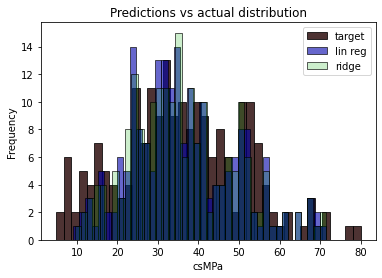

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#220000', alpha=0.8, bins=40)
sns.histplot(y_pred, label='lin reg', color='#0000aa', alpha=0.6, bins=40)
sns.histplot(prediction_ridge, label='ridge', color='#00aa00', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

In [24]:
print(w)

[  0.11976348   0.10254088   0.07739744  -0.12456354   0.12350427
   0.41947889   0.10951929  -0.08979822 -69.21900273]


In [25]:
print(ridge_regressor.best_estimator_.coef_)

[  0.11796341   0.10060922   0.07566991  -0.1301325    0.12297219
   0.41427699   0.09988402  -0.08107692 -62.99601643]


- weights are not the same but pretty close between linear regression and ridge regression

## Excersize: Improve model accuracy

- We are going to attempt to get the best rmse by selecting features

In [77]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


- Here we create lots of new descriptors to try out

In [171]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
subtr = np.abs(df.water.values-df.cement.values)
sqrt_water_cement = np.array(np.sqrt(subtr))
df["sqrt_water_cement"] = sqrt_water_cement

ratio_coarse_fine = np.array(df.coarseaggregate.values/df.fineaggregate.values)
df["ratio_coarse_fine"] = ratio_coarse_fine

exp_age = np.array(np.exp(-df.age.values))
df["exp_age"] = exp_age

new = np.array(df.superplasticizer.values/df.water.values)
df["new"] = new

new1 = np.array(df.sqrt_water_cement.values + df.new.values)
df["new1"] = new1

new2 = np.array(df.sqrt_water_cement.values/df.water.values)
df["new2"] = new2

new3 = np.array(df.water.values * -df.cement.values)
df["new3"] = new3

df['goodconcrete']=(df.csMPa>45.0).astype(int)
# now delete the actual values for csMPa
# the target values are now categorical
del df['csMPa']

# here we give condition that concrete has flyash
df['flyash']=(df.flyash>5.0)
# and replace the boolean with yes or no
df['flyash'] = df['flyash'].replace({True: 'yes', False: 'no'})

# split data using sklearn

# now assign the train and test data
df_train_full, df_test = train_test_split(df, random_state=104,test_size=0.20, shuffle=True)

# we now need to now split df_train_full into separate train and validation
df_train, df_val = train_test_split(df_train_full, random_state=100,test_size=0.25, shuffle=True)
df_val.index

# move target values out
y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values
y_test = df_test.goodconcrete.values

# get rid of target values in training data
del df_train['goodconcrete']
del df_val['goodconcrete']
del df_test['goodconcrete']

df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,sqrt_water_cement,ratio_coarse_fine,exp_age,new,new1,new2,new3,goodconcrete
0,540.0,0.0,no,162.0,2.5,1040.0,676.0,28,19.442222,1.538462,6.914400e-13,0.015432,19.457654,0.120014,-87480.0,1
1,540.0,0.0,no,162.0,2.5,1055.0,676.0,28,19.442222,1.560651,6.914400e-13,0.015432,19.457654,0.120014,-87480.0,1
2,332.5,142.5,no,228.0,0.0,932.0,594.0,270,10.222524,1.569024,5.501611e-118,0.000000,10.222524,0.044836,-75810.0,0
3,332.5,142.5,no,228.0,0.0,932.0,594.0,365,10.222524,1.569024,3.037485e-159,0.000000,10.222524,0.044836,-75810.0,0
4,198.6,132.4,no,192.0,0.0,978.4,825.5,360,2.569047,1.185221,4.508027e-157,0.000000,2.569047,0.013380,-38131.2,0


- Here we look at each descriptor's correlation with the target

In [172]:
from sklearn.metrics import mutual_info_score
# it can be useful to define a function for this
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.goodconcrete)

categorical = ['flyash']
# we can enact our function on a subset of data with '.apply(calculate_mi)'
df_mi = df_train_full[categorical].apply(calculate_mi)
#df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi

# create a new frame with column header by using option '.to_frame('name_of_column')'
numerical=['cement', 'slag', 'water', 'age', 'superplasticizer', 
           'coarseaggregate', 'fineaggregate','sqrt_water_cement',
           'ratio_coarse_fine','exp_age','new','new1','new2','new3']
df_train_full[numerical].corrwith(df_train_full.goodconcrete).to_frame('correlation')

,correlation
cement,0.381904
slag,0.086306
water,-0.288241
age,0.192417
superplasticizer,0.316354
coarseaggregate,-0.068311
fineaggregate,-0.098186
sqrt_water_cement,0.379104
ratio_coarse_fine,0.050021
exp_age,-0.191297


In [173]:
# remove the ones with bad correlation

numerical=['cement', 'slag', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [174]:
# break up categorical data into further categories
# Take each possibility from a category, make each possibility its own category
# have those categories just be boolean, True of False
# each of these categories are sub categories of the original category

from sklearn.feature_extraction import DictVectorizer

# let's take all of our features of train dataset and make records
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

dv.get_feature_names_out()

# this shows us all of our columns with respective values
dv.transform(train_dict)

# set a variable to hold the new columns of the one-hot coded data
# the only thing really affected was the column for flyash
X_train = dv.transform(train_dict)

# size varies based on how much of dataset we gave to train set
print(X_train.shape,dv.get_feature_names_out())

(618, 9) ['age' 'cement' 'coarseaggregate' 'fineaggregate' 'flyash=no' 'flyash=yes'
 'slag' 'superplasticizer' 'water']


In [175]:
from sklearn.linear_model import LogisticRegression

# create the model, apply it to our one-hot coded training dataset
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

# now here are the weights for each feature
model.coef_

# now we one-hot code our test dataset, so we can feed it into our model to test its accuracy
test_dict = df_test[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(test_dict)
X_test = dv.transform(test_dict)

# here are hard predictions, we don't know certainty
model.predict(X_test)

# here are soft predictions, the probabilities rather than just 0 or 1, its a score now
# first column is probability of being negative (tending towards 0 from sigmoid)
# second column is probability of being positive (tending towards 1 from sigmoid)
model.predict_proba(X_test)

# let's take all rows, but only take the probability of being good concrete
y_pred = model.predict_proba(X_test)[:, 1]

# so, we can make our prediction of good concrete based on whether or not
# our predicted target score is above 0.5, indicating a tendency towards 1
# which means concrete deemed 'good'
good_concrete = (y_pred >= 0.5)

# let's see the accuracy of our model for predicting the test data target
(y_test == good_concrete).mean()

0.8155339805825242

- I couldn't get it much better than this, I tried lots of combinations of different descriptors that I created

## Excersize: Do Kernel Ridge Regression

### also, this is my best RMSE I was able to get
### So this is lowest RMSE competition too

- Got my best rmse using the following descriptors and KRR

In [37]:
# we start with a set of descriptors, prepared for KRR
# includes a descriptor I created

df=pd.read_csv('Concrete_Data_Yeh.csv')
ratio_coarse_fine = np.array(df.coarseaggregate.values/df.fineaggregate.values)
df["ratio_coarse_fine"] = ratio_coarse_fine

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate',"ratio_coarse_fine"]

- Here is our manual linear regression first

In [38]:
X_test = prepare_X(df_test)
X_val = prepare_X(df_val)
X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

10.322978159735996

- Kernel ridge regression, I will use a gaussian kernel 'rbf'
- Sklearn will find the best parameter values for both the penalty term 'alpha' and the kernel parameter 'gamma'
- 'gamma' is a parameter in the equation for the gaussian kernel 'rbf'
- Best values are found with GridSearchCV

In [39]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import math
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40],'gamma':[1e-6,1e-5,1e-4,1e-3,5e-6]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)

ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(math.sqrt(-1.0*ridge_regressor.best_score_))

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.18349e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.10392e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.31734e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.14797e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.p

{'alpha': 0.001, 'gamma': 1e-05}
5.996260468168827


In [40]:
prediction_ridge=ridge_regressor.predict(X_train)

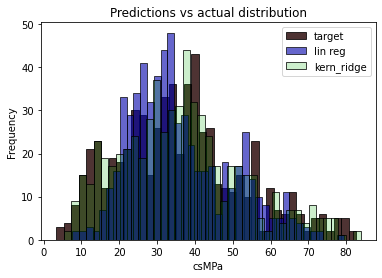

In [41]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.8, bins=40)
sns.histplot(y_pred, label='lin reg', color='#0000aa', alpha=0.6, bins=40)
sns.histplot(prediction_ridge, label='kern_ridge', color='#00aa00', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

- It looks like the kernel ridge regression may have given us a big improvement. Much better RMSE vs just linear regression, also looks better when plotted

- Let's see how the model works on test dataset... it will help us know if we overfit to our training dataset as well

In [42]:
prediction_ridge=ridge_regressor.predict(X_test)

y_pred = w_0 + X_test.dot(w)

print('Linear Regression RMSE:' , rmse(y_test, y_pred))
print('Kernel Ridge RMSE:' , math.sqrt(-1.0*ridge_regressor.score(X_test,y_test)))

Linear Regression RMSE: 10.137544618077214
Kernel Ridge RMSE: 5.502642076184336


- Kernel Ridge gives better RMSE on test set

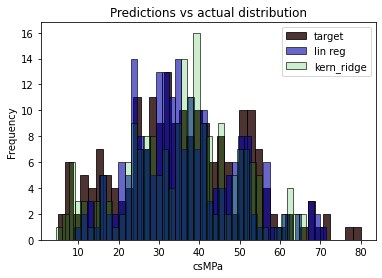

In [43]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#220000', alpha=0.8, bins=40)
sns.histplot(y_pred, label='lin reg', color='#0000aa', alpha=0.6, bins=40)
sns.histplot(prediction_ridge, label='kern_ridge', color='#00aa00', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

- Seems like Kernel Ridge Regression really does a good job given the correct parameters

# 1/28 K nearest neighbors regression

- Uses K-nearest neighbors to make predictions about groupings
- In 1D, Finds the nearest neighbors of a given x point, then makes a y value prediction based on the nearest neighbor y values
- You tell the model how many nearest neighbors to use, where K = 1 is just using one nearest neighbor to make the prediction
- Using just one nearest neighbor will set the prediction exactly at that neighbor's value
- Using more nearest neighbors will take the average of those neighbor's values
- Works well for interpolating, crappy at extrapolating

## Excersize: Compare timings for LASSO, Ridge Regression, and Kernel Ridge

- So we will compute the time it takes to do each and plot
- Let's do this for 3 different sizes of training dataset

In [24]:
import time
base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate']

In [25]:
# training data is 80 percent overall

df=pd.read_csv('Concrete_Data_Yeh.csv')

n_val = int(len(df)*0.1)
n_test = int(len(df)*0.1)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

X_test = prepare_X(df_test)
X_val = prepare_X(df_val)
X_train = prepare_X(df_train)

In [26]:
# training data is 60 percent overall

df=pd.read_csv('Concrete_Data_Yeh.csv')

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train1 = np.array(df_train.csMPa.values)
y_val1 = np.array(df_val.csMPa.values)
y_test1 = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

X_test1 = prepare_X(df_test)
X_val1 = prepare_X(df_val)
X_train1 = prepare_X(df_train)

In [27]:
# training data is 40 percent overall

df=pd.read_csv('Concrete_Data_Yeh.csv')

n_val = int(len(df)*0.3)
n_test = int(len(df)*0.3)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train2 = np.array(df_train.csMPa.values)
y_val2 = np.array(df_val.csMPa.values)
y_test2 = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

X_test2 = prepare_X(df_test)
X_val2 = prepare_X(df_val)
X_train2 = prepare_X(df_train)

- We will start with KRR

In [39]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import math

start_time = time.perf_counter()
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45],'gamma':[1e-6,1e-5,1e-4,1e-3,5e-6]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

elapsed_KRR_80 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45],'gamma':[1e-6,1e-5,1e-4,1e-3,5e-6]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train1,y_train1)

elapsed_KRR_60 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45],'gamma':[1e-6,1e-5,1e-4,1e-3,5e-6]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train2,y_train2)

elapsed_KRR_40 = (time.perf_counter() - start_time)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.0649e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.09436e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.25201e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.23449e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.89084e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.09971e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.p

In [40]:
print(elapsed_KRR_40)
print(elapsed_KRR_60)
print(elapsed_KRR_80)

1.8916441000000077
4.138681100000099
8.452050099999951


- Now for Ridge Regression

In [50]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
import math

start_time = time.perf_counter()
ridge=Ridge(normalize = True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

elapsed_RR_80 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
ridge=Ridge(normalize = True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train1,y_train1)

elapsed_RR_60 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
ridge=Ridge(normalize = True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train2,y_train2)

elapsed_RR_40 = (time.perf_counter() - start_time)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

In [51]:
print(elapsed_RR_40)
print(elapsed_RR_60)
print(elapsed_RR_80)

0.09851939999998649
0.10404640000001564
0.11801519999994525


- And now for LASSO

In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

start_time = time.perf_counter()
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)

elapsed_LASSO_80 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train1,y_train1)

elapsed_LASSO_60 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train2,y_train2)

elapsed_LASSO_40 = (time.perf_counter() - start_time)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.953e+04, tolerance: 2.197e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+04, tolerance: 2.193e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.878e+04, toleranc

In [54]:
print(elapsed_LASSO_40)
print(elapsed_LASSO_60)
print(elapsed_LASSO_80)

0.13994079999997666
0.15005940000003193
0.16700990000003912


- Now we will plot these and see how they compare
- Here are two plots, one zoomed out to show how much longer KRR takes than the others
- However, some of this is because I have sklearn find optimize two parameters, alpha and gamma

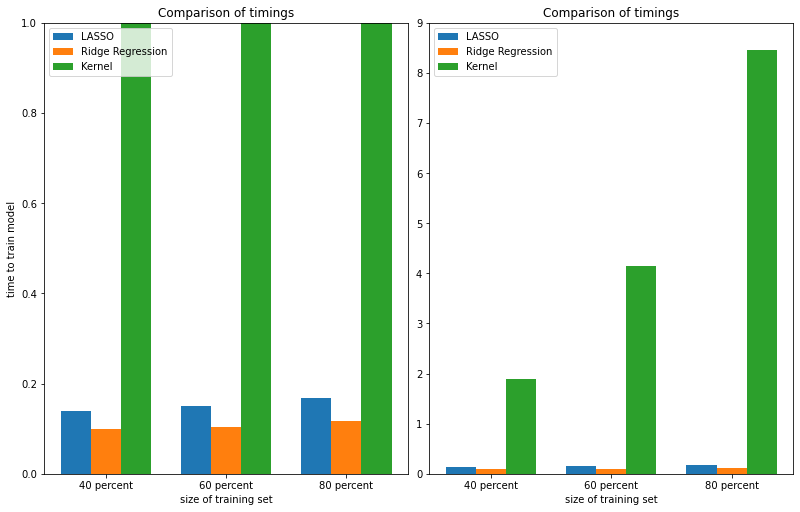

In [69]:
import matplotlib.pyplot as plt
import numpy as np

size = ("40 percent", "60 percent", "80 percent")
values = {
    'LASSO': (elapsed_LASSO_40, elapsed_LASSO_60, elapsed_LASSO_80),
    'Ridge Regression': (elapsed_RR_40, elapsed_RR_60, elapsed_RR_80),
    'Kernel': (elapsed_KRR_40, elapsed_KRR_60, elapsed_KRR_80),
}

x = np.arange(len(size))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,2,layout='constrained',figsize=(11, 7))

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('time to train model')
ax[0].set_title('Comparison of timings')
ax[0].set_xlabel('size of training set')
ax[0].set_xticks(x + width, size)
ax[0].legend(loc='upper left')
ax[0].set_ylim(0, 1)

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_title('Comparison of timings')
ax[1].set_xlabel('size of training set')
ax[1].set_xticks(x + 4*width, size)
ax[1].legend(loc='upper left')
ax[1].set_ylim(0, 9)



plt.show()

- Below I don't have gridsearchcv optimize gamma, decreases time for KRR by quite a bit

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


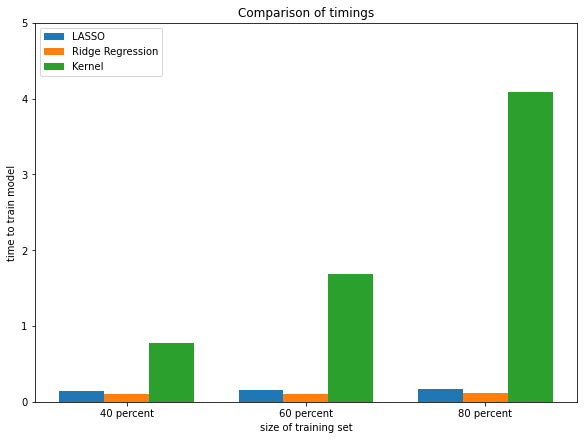

In [72]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import math

start_time = time.perf_counter()
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

elapsed_KRR_80 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train1,y_train1)

elapsed_KRR_60 = (time.perf_counter() - start_time)
#
#
start_time = time.perf_counter()
kern_ridge=KernelRidge(kernel='rbf')
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45]}
ridge_regressor=GridSearchCV(kern_ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train2,y_train2)

elapsed_KRR_40 = (time.perf_counter() - start_time)

size = ("40 percent", "60 percent", "80 percent")
values = {
    'LASSO': (elapsed_LASSO_40, elapsed_LASSO_60, elapsed_LASSO_80),
    'Ridge Regression': (elapsed_RR_40, elapsed_RR_60, elapsed_RR_80),
    'Kernel': (elapsed_KRR_40, elapsed_KRR_60, elapsed_KRR_80),
}

x = np.arange(len(size))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(8, 6))

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('time to train model')
ax.set_title('Comparison of timings')
ax.set_xlabel('size of training set')
ax.set_xticks(x + width, size)
ax.legend(loc='upper left')
ax.set_ylim(0, 5)

plt.show()

# Excersize: Use KNN clustering

- First we will create some blobs with x,y coordinates 
- We get each point's coordinates (X_blobs) and each point's label corresponding to which group it belongs (y_blobs)

In [2]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
import math
#import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# here we set the style of the plots that will be shown below
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (8,6)
title_size=24

# We set a random_state to generate always the same Gaussian sampling.
random_state = 0
# The make_blobs function requires the centers, standard deviations and number of samples for each Gaussian to sample.
centers = [[10,7],[0,3],[-5,0],[3,0]]
n_samples = [500,200,300,100]
cluster_std=[1.5,1,1,0.5]
     
X_blobs, y_blobs = make_blobs(n_samples=n_samples,
                   random_state=random_state,
                   cluster_std=cluster_std,
                   centers=centers)

In [3]:
X_blobs

array([[-0.91965069,  5.64293572],
       [ 8.58344726,  7.35715472],
       [-4.9746144 ,  0.61039176],
       ...,
       [11.40466859,  6.94735723],
       [ 9.70240165,  7.14128845],
       [ 8.81699612,  8.64195756]])

In [4]:
y_blobs

array([1, 0, 2, ..., 0, 0, 0])

- Now we use sklearn KNN algorithm
- We give it a k value, number of nearest neighbors to look at to determine a point's group
- We fit the model onto the clusters made in our training set
- We fit to the location of each point and each point's group label

In [5]:
#from sklearn.neighbors import KNeighborsRegressor

#knn=KNeighborsRegressor(n_neighbors=4)
#knn.fit(X_blobs, y_blobs)

In [6]:
# we use gridsearchcv to help us determine best number of neighbors to use

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6]}
knn_classifier=GridSearchCV(knn,parameters,scoring='neg_mean_squared_error',cv=5)
knn_classifier.fit(X_blobs,y_blobs)
print(knn_classifier.best_params_)
print(math.sqrt(-1.0*knn_classifier.best_score_))

{'n_neighbors': 1}
0.03015113445777636


- Interesting how I am just getting 1, seems to be the best for this particular dataset
- Not sure how gridsearchcv determines the best k value, without overfitting or underfitting
- Now we can use the model to predict which grouping a new point belongs in our dataset

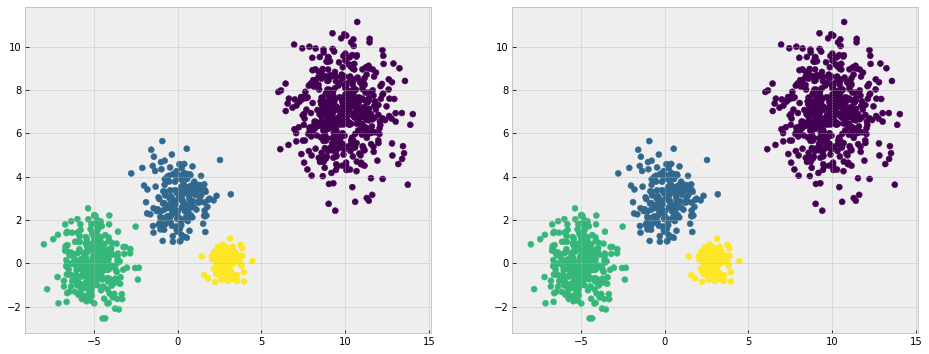

In [7]:
# let's plot the predicted points with labels vs actual
# first get all the predicted labels for X_blobs

labels = knn_classifier.predict(X_blobs)

# now plot

fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_blobs[:,0],X_blobs[:,1],c=labels)
axs[1].scatter(X_blobs[:,0],X_blobs[:,1],c=y_blobs)

- Looks like it did a good job, let's see what checking a single point is like...

In [8]:
knn_classifier.predict([[1,2]])

array([1])

- This is telling us that the point (1,2) belongs to group 1 according to the model

In [9]:
# here I create a new y_blobs list that sets all labels not equal to 1 to zero
# this will help reveal which cluster corresponds to label 1
yy = y_blobs
for i in range(len(y_blobs)):
    if yy[i] != 1:
        yy[i] = 0

- Plot the clusters, cluster 1 is yellow, all others purple
- Red dot is point we are predicting to be part of group 1

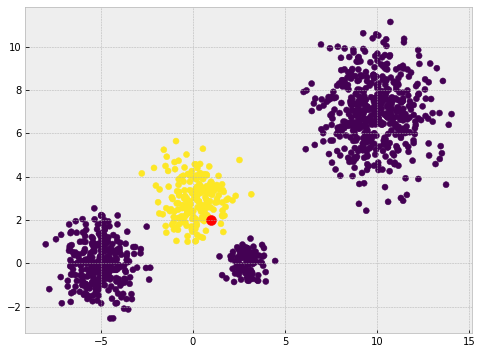

In [10]:
fig, axs = plt.subplots(1,1)
axs.scatter(X_blobs[:,0],X_blobs[:,1],c=yy)
axs.scatter([1],[2],s=100,c='red')

- Seems like a reasonable prediction

# Excersize: Use KNN on your descriptors

- How about we try KNN regressor on our descriptors for concrete as well 

In [30]:
base = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 
        'coarseaggregate', 'fineaggregate']
df=pd.read_csv('Concrete_Data_Yeh.csv')

n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

y_train = np.array(df_train.csMPa.values)
y_val = np.array(df_val.csMPa.values)
y_test = np.array(df_test.csMPa.values)

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

X_test = prepare_X(df_test)
X_val = prepare_X(df_val)
X_train = prepare_X(df_train)

In [34]:
# here we use knn regressor
# gridsearch will help us find best number of neighbors to use

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,20,30,40]}
knn_regressor=GridSearchCV(knn,parameters,scoring='neg_mean_squared_error',cv=5)
knn_regressor.fit(X_train,y_train)
print(knn_regressor.best_params_)
print('Train RMSE:',math.sqrt(-1.0*knn_regressor.best_score_))

{'n_neighbors': 6}
Train RMSE: 10.336667763498355


- Here the best number of neighbors according to my given values is 6
- Not a bad RMSE compared to the others I have gotten with other methods such as linear regression and lasso, about the same
- Other than KRR which gave the best out of all so far by a lot according to RMSE
- Let's go ahead and just plot this against our linear regression model

In [35]:
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_test.dot(w)

prediction_knn = knn_regressor.predict(X_test)

print('Linear Regression RMSE test set:' , rmse(y_test, y_pred))
print('KNN RMSE test set:' , math.sqrt(-1.0*knn_regressor.score(X_test,y_test)))

Linear Regression RMSE test set: 10.217404223197772
KNN RMSE test set: 9.419528735660917


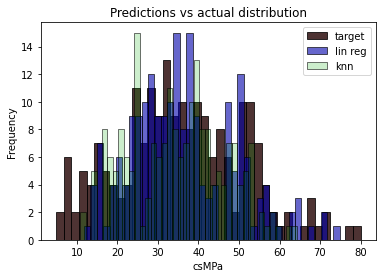

In [36]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#220000', alpha=0.8, bins=40)
sns.histplot(y_pred, label='lin reg', color='#0000aa', alpha=0.6, bins=40)
sns.histplot(prediction_knn, label='knn', color='#00aa00', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

- So, despite a smaller RMSE value given by the KNN vs linear regression, the places where KNN gets a good fit is different from linear regression, so its hard to know which is better